### PCA преобразование

In [5]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

### Загружаем исходные данные

In [7]:
train = np.loadtxt('digit-recognizer/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('digit-recognizer/test.csv', delimiter=',', skiprows=1)

In [23]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [24]:
train_img.shape

(42000, 28, 28)

### Визуализируем исходные данные

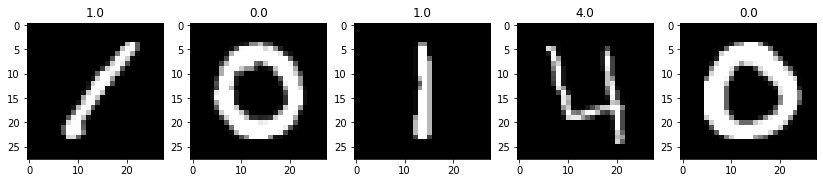

In [25]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

### Разделяем на тест-трейн 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X_scaled = scale(train[:, 1:])
x_train, x_test, y_train, y_test = train_test_split(X_scaled, train_label, test_size=0.3, random_state=42)

### Сделаем PCA преобразование на  150 компонент

In [31]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
pca.fit(x_train)
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

In [32]:
svc =SVC(gamma='auto', kernel='linear', class_weight='balanced')
svc.fit(X_train_pca, y_train)

SVC(class_weight='balanced', gamma='auto', kernel='linear')

In [33]:
y_pred = svc.predict(X_test_pca)

### Посмотрим на accuracy

In [34]:
from sklearn import metrics
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

0.9350793650793651


### Получим значения на тесте

In [35]:
submission=svc.predict(pca.transform(scale(test)))

### Визуализируем

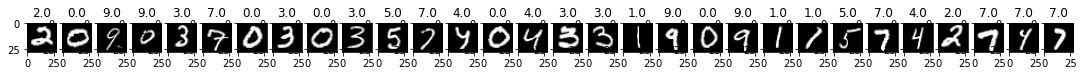

In [36]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:30], 1):
    subplot = fig.add_subplot(1, 32, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % submission[i - 1]);

### Готовим файл для отправки

In [37]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(submission.astype(int), 1):
        dst.write('%s,%s\n' % (i, p))